In [11]:
import pandas as pd
import numpy as np
import json
import os
import collections
from tqdm import tqdm

# Load sources

In [10]:
# load https://www.aminer.org/citation v10
directory_path = "../data/external/dblp-ref-10"

publications = []

try:
    file_names = os.listdir(directory_path)
    for file_name in file_names:
        print(file_name)
        with open(os.path.join(directory_path, file_name)) as input_file:
            for line in tqdm(input_file):
                publication = json.loads(line)
                if 'references' not in publication:
                    publication['references'] = []
                if 'authors' not in publication:
                    publication['authors'] = []
                publications.append(publication)
        
except FileNotFoundError:
    print(f"Katalog '{directory_path}' nie istnieje.")

except PermissionError:
    print(f"Brak uprawnień do odczytu katalogu '{directory_path}'.")

display(len(publications))

dblp-ref-0.json


1000000it [00:37, 26986.73it/s]


dblp-ref-1.json


1000000it [00:42, 23313.70it/s]


dblp-ref-2.json


1000000it [00:42, 23475.56it/s]


dblp-ref-3.json


79007it [00:02, 33889.45it/s]


3079007

In [11]:
display(publications[0])

{'abstract': 'The purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net- works. More specifically, we focus on the basic principles of network proto- cols as the aim to develop our learning tool. Our tool gives students hands-on experience to help understand the basic principles of network protocols.',
 'authors': ['Makoto Satoh',
  'Ryo Muramatsu',
  'Mizue Kayama',
  'Kazunori Itoh',
  'Masami Hashimoto',
  'Makoto Otani',
  'Michio Shimizu',
  'Masahiko Sugimoto'],
 'n_citation': 0,
 'references': ['51c7e02e-f5ed-431a-8cf5-f761f266d4be',
  '69b625b9-ebc5-4b60-b385-8a07945f5de9'],
 'title': 'Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map',
 'venue': 'international conference on human-computer interaction',
 'year': 2013,
 'id': '00127ee2-cb05-48ce-bc49-9de556b93346'}

In [12]:
dblp_publications_df = pd.DataFrame(publications, columns=['n_citation'])
display(dblp_publications_df.head())

,n_citation
0,0
1,50
2,50
3,0
4,2


## a) Create distribution

In [13]:
dblp_publications_df['n_citation'] = dblp_publications_df['n_citation'].astype(int)

# Grupowanie i liczenie liczby artykułów dla każdej wartości n_citation (ilosc cytowań, ile prac był tyle razy zacytowanych)
dblp_distribution_citations = collections.Counter(dblp_publications_df['n_citation'])

In [14]:
display(dblp_distribution_citations)

Counter({50: 852684,
         0: 718250,
         1: 194775,
         2: 138457,
         3: 106100,
         4: 84810,
         5: 69418,
         6: 58623,
         7: 49882,
         8: 42951,
         9: 37748,
         10: 33460,
         11: 29743,
         12: 26922,
         13: 24193,
         14: 21942,
         15: 19955,
         16: 18457,
         17: 16673,
         18: 15307,
         19: 14318,
         20: 13553,
         21: 12448,
         22: 11741,
         23: 10671,
         24: 10125,
         25: 9665,
         26: 9175,
         27: 8541,
         28: 8100,
         29: 7748,
         30: 7286,
         51: 7135,
         31: 6879,
         52: 6799,
         53: 6641,
         32: 6551,
         33: 6137,
         54: 5804,
         34: 5786,
         35: 5555,
         55: 5456,
         36: 5449,
         63: 5212,
         37: 5142,
         61: 5041,
         38: 4992,
         62: 4928,
         65: 4634,
         64: 4620,
         39: 4619,
         4

In [15]:
df = pd.DataFrame({'distribution': [str(dict(dblp_distribution_citations))]})
df.to_csv('dblp_distribution_citations.csv', index=False)

# 2 Powerlaw

In [1]:
import pandas as pd
import numpy as np
import json
import os
import collections
from tqdm import tqdm
import matplotlib.pyplot as plt
import powerlaw
import ast
from scipy.stats import ks_2samp

In [2]:
df_source = pd.read_csv('dblp_distribution_citations.csv')

src_dist = df_source.iloc[0,0]

In [3]:
src = ast.literal_eval(src_dist)

In [4]:
sorted_keys = sorted(src.keys())
sorted_values = [src[key] for key in tqdm(sorted_keys, desc="Processing keys")]

Processing keys: 100%|████████████████████████████████████████████████████████| 3217/3217 [00:00<00:00, 6275849.29it/s]


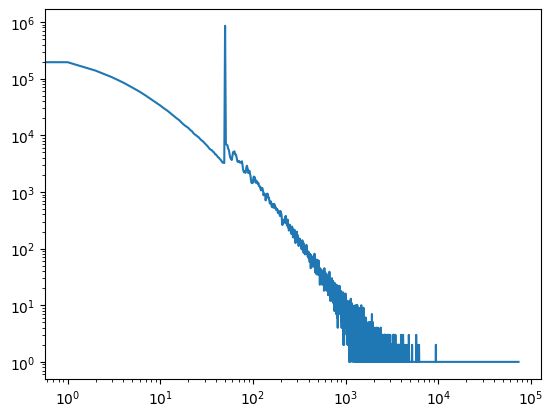

In [5]:
# Ustawienie wartości 'agg.path.chunksize'
# plt.rcParams['agg.path.chunksize'] = 10000
# Ustawienie wartości 'path.simplify_threshold'
# plt.rcParams['path.simplify_threshold'] = 1.0  # Zwiększenie wartości do 1.0, aby uprościć ścieżkę

plt.loglog(sorted_keys, sorted_values)

In [6]:
display(src_dist)

'{0: 718250, 50: 852684, 2: 138457, 7: 49882, 6: 58623, 3: 106100, 101: 1760, 8: 42951, 12: 26922, 1: 194775, 10: 33460, 26: 9175, 13: 24193, 25: 9665, 19: 14318, 14: 21942, 4: 84810, 29: 7748, 9: 37748, 17: 16673, 383: 90, 36: 5449, 97: 1433, 5: 69418, 20: 13553, 69: 3371, 117: 1269, 46: 3454, 93: 2074, 16: 18457, 21: 12448, 18: 15307, 95: 1657, 24: 10125, 73: 3285, 28: 8100, 43: 4011, 39: 4619, 54: 5804, 22: 11741, 23: 10671, 131: 933, 15: 19955, 66: 4326, 277: 201, 61: 5041, 11: 29743, 27: 8541, 81: 2284, 38: 4992, 35: 5555, 180: 494, 87: 2709, 33: 6137, 72: 3304, 44: 3781, 78: 2550, 62: 4928, 37: 5142, 30: 7286, 31: 6879, 2531: 1, 79: 2348, 53: 6641, 405: 77, 145: 838, 41: 4308, 32: 6551, 150: 704, 51: 7135, 85: 2726, 418: 73, 105: 1794, 40: 4565, 566: 33, 387: 90, 90: 2159, 57: 4004, 96: 1485, 71: 3511, 65: 4634, 104: 1762, 48: 3295, 67: 3834, 137: 709, 462: 57, 63: 5212, 164: 592, 910: 9, 82: 2279, 127: 1148, 122: 1062, 86: 2903, 183: 497, 55: 5456, 91: 2365, 658: 26, 161: 607, 9

In [7]:
for i in range(47, 54):
    print(f"Liczba artykułów cytowanych {i} razy: {sorted_values[i]}")

Liczba artykułów cytowanych 47 razy: 3290
Liczba artykułów cytowanych 48 razy: 3295
Liczba artykułów cytowanych 49 razy: 3238
Liczba artykułów cytowanych 50 razy: 852684
Liczba artykułów cytowanych 51 razy: 7135
Liczba artykułów cytowanych 52 razy: 6799
Liczba artykułów cytowanych 53 razy: 6641


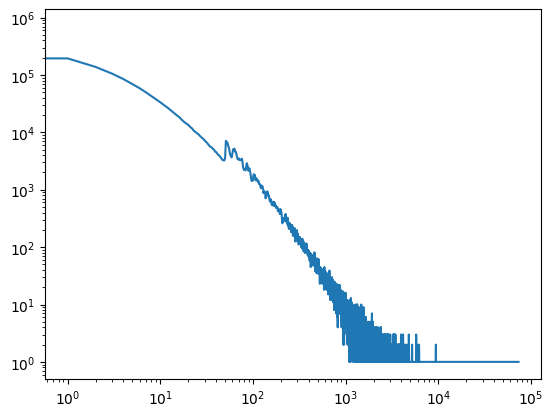

In [13]:
sorted_values[50] = 3500
plt.loglog(sorted_keys, sorted_values)

In [14]:
fit = powerlaw.Fit(sorted_values)
alpha = fit.alpha
print(f"Wartość współczynnika charakterystycznego: {alpha}")

Calculating best minimal value for power law fit
Wartość współczynnika charakterystycznego: 1.4566551566080386


<Axes: >

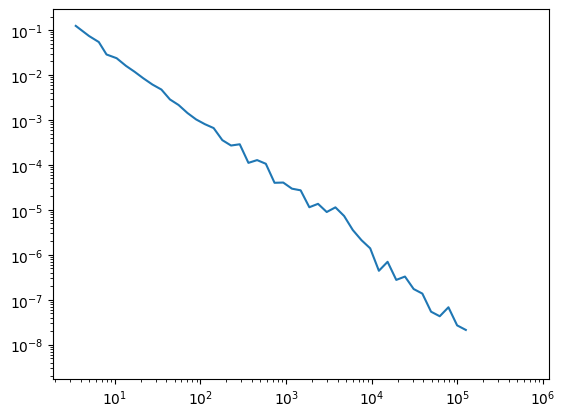

In [15]:
fit.plot_pdf() # gęstość rozkładu

<Axes: >

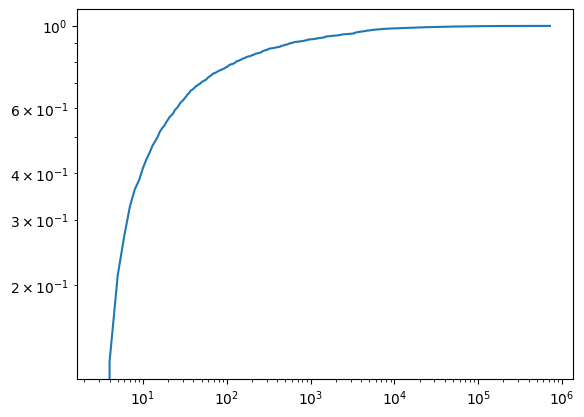

In [16]:
fit.plot_cdf() # kumulatywna gęstość rozkładu

In [17]:
fit.distribution_compare('power_law', 'exponential')

(5073.7273957450125, 1.2053823994959316e-20)

In [19]:
df_citations = pd.read_csv('distribution_citations.csv')
df_citations.head()

,distribution_citations_csv
0,"{77: 154, 434: 8, 642: 4, 2: 14147, 41: 333, 6..."
1,"{657: 9, 57: 227, 2: 13482, 4: 5932, 228: 24, ..."
2,"{653: 2, 65: 179, 2: 13387, 5: 4617, 236: 28, ..."
3,"{49: 254, 33: 446, 529: 6, 28: 528, 805: 4, 22..."
4,"{8: 2748, 35: 386, 132: 56, 206: 32, 41: 341, ..."


In [22]:
df_citations['dist'] = df_citations.distribution_citations_csv.apply(lambda x: ast.literal_eval(x))
df_citations['sorted_keys'] = df_citations.dist.apply(lambda x: sorted(x.keys()))
df_citations['sorted_values'] = df_citations[["sorted_keys", "dist"]].apply(lambda x: [x[1][y] for y in x[0]], axis=1)
#df_citations['ks_test'] = df_citations.sorted_values.apply(lambda x: ks_2samp(sorted_values, x)[1])
#df_citations['ks_test_less'] = df_citations.sorted_values.apply(lambda x: ks_2samp(sorted_values, x, alternative='less')[1])
df_citations['powerlaw_fit'] = df_citations.sorted_values.apply(lambda x: powerlaw.Fit(x))
df_citations['powerlaw_pval'] = df_citations.powerlaw_fit.apply(lambda x: x.distribution_compare('power_law', 'exponential')[1])
df_citations['powerlaw_alpha'] = df_citations.powerlaw_fit.apply(lambda x: x.alpha)

C:\Users\user\AppData\Local\Temp\ipykernel_16524\2042316369.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_citations['sorted_values'] = df_citations[["sorted_keys", "dist"]].apply(lambda x: [x[1][y] for y in x[0]], axis=1)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [23]:
df_citations.powerlaw_alpha.describe()

count    306.000000
mean       1.739784
std        0.052073
min        1.506517
25%        1.713748
50%        1.737709
75%        1.766486
max        1.906968
Name: powerlaw_alpha, dtype: float64

<Axes: ylabel='Density'>

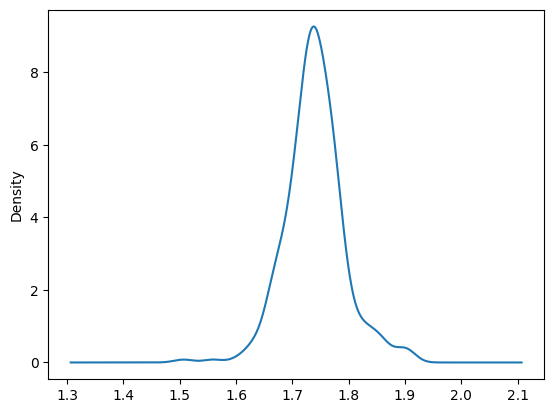

In [24]:
df_citations.powerlaw_alpha.plot(kind='kde')

In [25]:
df_citations.powerlaw_pval.describe()

count    3.060000e+02
mean     1.794701e-03
std      5.450133e-03
min      4.991063e-26
25%      5.929421e-09
50%      4.047879e-06
75%      3.142455e-04
max      4.625311e-02
Name: powerlaw_pval, dtype: float64

In [26]:
df_citations.ks_test.describe()

count    3.060000e+02
mean     1.365112e-03
std      1.564800e-02
min      8.056577e-40
25%      4.133527e-23
50%      1.139670e-17
75%      3.363428e-09
max      2.520815e-01
Name: ks_test, dtype: float64

In [27]:
df_citations.ks_test_less.describe()

AttributeError: 'DataFrame' object has no attribute 'ks_test_less'

In [28]:
fit_exp = df_citations.powerlaw_fit.iloc[0]

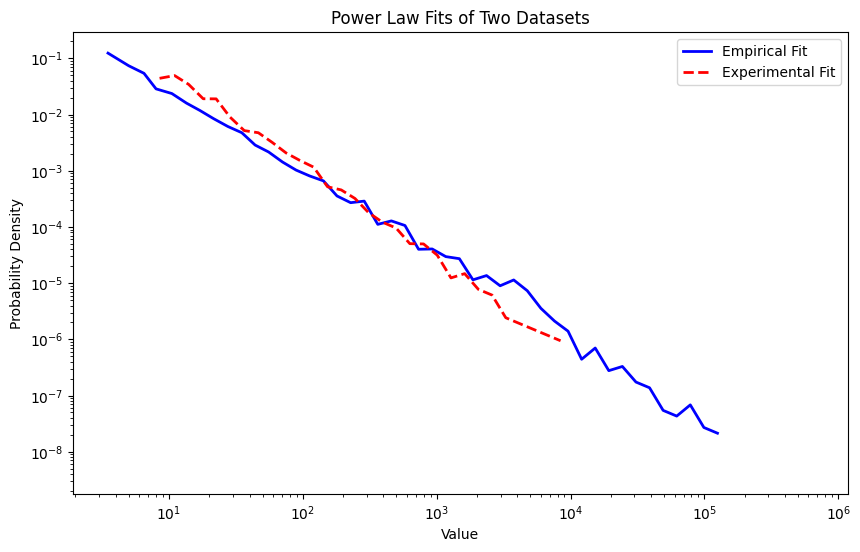

In [29]:
plt.figure(figsize=(10, 6))

fit.plot_pdf(color='blue', label='Empirical Fit', linestyle='-', linewidth=2)
fit_exp.plot_pdf(color='red', label='Experimental Fit', linestyle='--', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Power Law Fits of Two Datasets')
plt.legend()
plt.show()

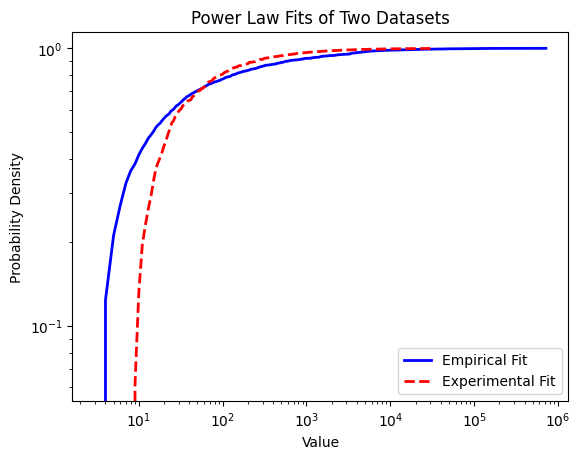

In [30]:
fit.plot_cdf(color='blue', label='Empirical Fit', linestyle='-', linewidth=2)
fit_exp.plot_cdf(color='red', label='Experimental Fit', linestyle='--', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Power Law Fits of Two Datasets')
plt.legend()
plt.show()